# Open TA: Inertial vs overdamped:
In this exercise, you will study the transition between an inertial and overdamped motion of a Brownian particle numerically. We assume a Brownian particle moving in a (1D) liquid without additional external forces, which is described by the Klein-Kramers Langevin equation:
1. $\\dX = V dt\\$
2. $\\dV = -\gamma Vdt + \sqrt{2D}dW\\$

## Question a):
Why can you assume that: $\gamma \sim D$? What determines the proportionality factor?
- The Fluctuation-Dissipation theorem states that: $\gamma = \frac{M}{k_B T}D$, i.e., $\gamma \sim D$. As the theorem suggests, the proportionality factor is  determined by the particle's mass, $M$, and the temperature of the system, $T$.

## Question b):
Numerically compute the trajectory for a single Brownian particle that starts at the origin with finite velocity $v_0$. Find suitable parameters for $v_0$, $\gamma$, $D$ (assuming $D \sim \gamma$) so that by changing $\gamma$, you can demonstrate the transition between inertial and overdamped motion.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fast')

### Inertial case

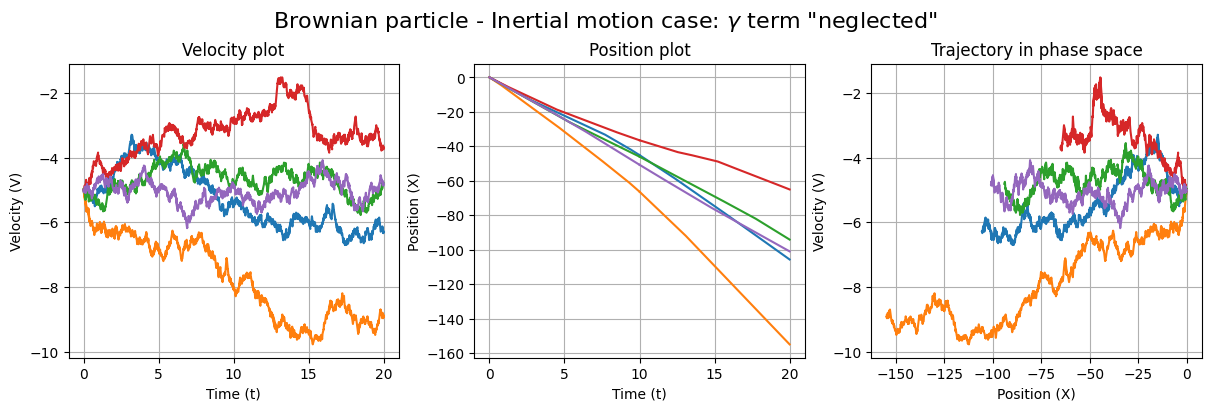

In [3]:
x0     = 0;    v0   = -5.  # Initial position and velocity
Gamma  = 0.00005; D = 0.1  # Model parameters
tMax   = 20; tSteps = 10_000; dt = tMax/tSteps

TrajsX = []; TrajsV = []
M      = 5                 # Number of trajectories

# Euler-Maruyama loop
for m in range(M):
    xVec   = [x0]
    vVec   = [v0]
    dW     = np.random.normal(0., np.sqrt(dt), size = tSteps) # Wiener process: Mean = 0; Std_Dev = Sqrt(Var) = Sqrt(dt).
    for i in range(tSteps):
        xVec.append(xVec[i] + vVec[i] * dt)
        vVec.append(vVec[i] - Gamma * vVec[i] * dt + np.sqrt(2*D) * dW[i])
    TrajsX.append(xVec)
    TrajsV.append(vVec)

# Plotting results
fig, axs = plt.subplots(1, 3, layout='constrained', figsize=(12, 4))
fig.suptitle(r'Brownian particle - Inertial motion case: $\gamma$ term "neglected"', fontsize = 16)
for i in range(M):
    axs[0].plot(np.linspace(0., tMax, tSteps + 1), TrajsV[i])
axs[0].set_xlabel("Time (t)")
axs[0].set_ylabel("Velocity (V)")
axs[0].set_title(r"Velocity plot")
axs[0].grid(True)

for i in range(M):
    axs[1].plot(np.linspace(0., tMax, tSteps + 1), TrajsX[i])
axs[1].set_xlabel("Time (t)")
axs[1].set_ylabel("Position (X)")
axs[1].set_title(r"Position plot")
axs[1].grid(True)

for i in range(M):
    axs[2].plot(TrajsX[i], TrajsV[i])
axs[2].set_xlabel("Position (X)")
axs[2].set_ylabel("Velocity (V)")
axs[2].set_title(r"Trajectory in phase space")
axs[2].grid(True)

**Inertial case**: Here, we can *almost* neglect the damping term! We can see that the velocity plot shows very evident signs of diffusive motion (even more evident if we plot more trajectories - change $\verb|M|$ value). The damping here is barely visible! The position plot, on the other hand, appears to be close to a straight line, which implies *almost* constant velocity, as a consequence of an almost negligeble damping term (consistent with the velocity plot). As far as the trajectory in phase-space is concerned, not much useful information can be extracted from it... However, I note that we can no longer see the same "cloud" as in the **overdamped case**. Also, the overall behaviour is clearly distinct: we can also no longer see the same diagonal line as before (c.f. **Overdamped case** section, below).

### Overdamped case

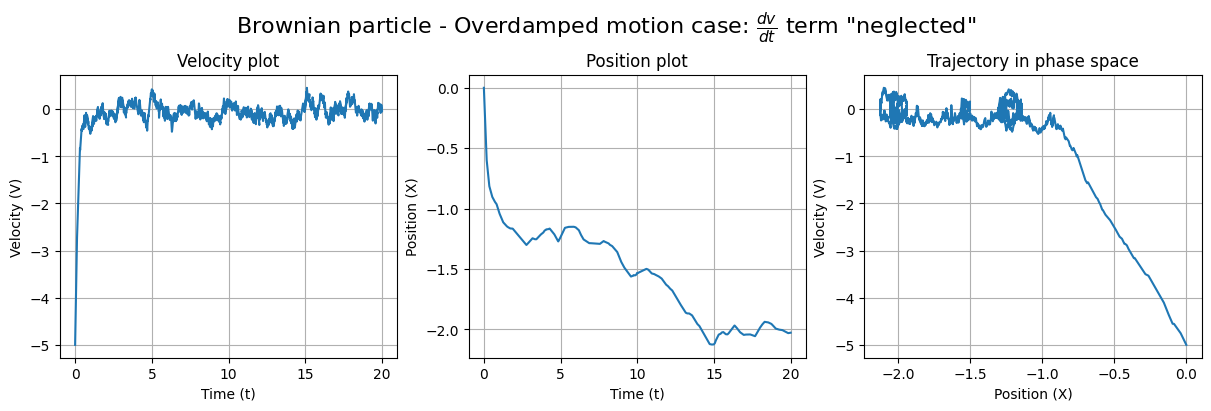

In [4]:
x0     = 0; v0      = -5.  # Initial position and velocity
Gamma  = 5; D       = 0.1  # Model parameters
tMax   = 20; tSteps = 10_000; dt = tMax/tSteps

TrajsX = []; TrajsV = []
M      = 1                 # Number of trajectories

# Euler-Maruyama loop
for m in range(M):
    xVec   = [x0]
    vVec   = [v0]
    dW     = np.random.normal(0., np.sqrt(dt), size = tSteps) # Wiener process: Mean = 0; Std_Dev = Sqrt(Var) = Sqrt(dt).
    for i in range(tSteps):
        xVec.append(xVec[i] + vVec[i] * dt)
        vVec.append(vVec[i] - Gamma * vVec[i] * dt + np.sqrt(2*D) * dW[i])
    TrajsX.append(xVec)
    TrajsV.append(vVec)

# Plotting results
fig, axs = plt.subplots(1, 3, layout='constrained', figsize=(12, 4))
fig.suptitle(r'Brownian particle - Overdamped motion case: $\frac{dv}{dt}$ term "neglected"', fontsize = 16)
for i in range(M):
    axs[0].plot(np.linspace(0., tMax, tSteps + 1), TrajsV[i])
axs[0].set_xlabel("Time (t)")
axs[0].set_ylabel("Velocity (V)")
axs[0].set_title(r"Velocity plot")
axs[0].grid(True)

for i in range(M):
    axs[1].plot(np.linspace(0., tMax, tSteps + 1), TrajsX[i])
axs[1].set_xlabel("Time (t)")
axs[1].set_ylabel("Position (X)")
axs[1].set_title(r"Position plot")
axs[1].grid(True)

for i in range(M):
    axs[2].plot(TrajsX[i], TrajsV[i])
axs[2].set_xlabel("Position (X)")
axs[2].set_ylabel("Velocity (V)")
axs[2].set_title(r"Trajectory in phase space")
axs[2].grid(True)

**Overdamped case**: Velocity plot is rather self-explanatory. We have some initial velocity, which is damped until it reaches zero. This reflects in the position graph, in which we can see that we initially move in the negative $x$ direction, as a consequence of a negative $v_0$. At some point, $v = 0$, such that $x$ would remain constant, if not for the diffusion term! Note that in this case, $D_x = \frac{D}{\gamma^2}$, which is small since $\gamma$ is large! Hence, we don't see much diffusion, in $x$, after the initial velocity has been completely damped, i.e., for (roughly) $t > 5$. In phase-space, we can see the damping (diagonal line), followed by some diffusive motion ("cloud" around $v=0$).

## Question c)
Stokes formula states that $\gamma = 6 \pi \eta a$, i.e., $\gamma \sim a$. This means that larger particles (i.e., with a larger radius, $a$) are, effectively, more affected by this damping term. Additionally, the more viscous the fluid is, the stronger the damping is, which seems logical/intuitive enough. In the code that follows, I attempt to model a brownian particle in water, for which $\eta = 1.0016 \times 10^{-3} Pa\cdot s$ (Taken from [Wikipedia](https://en.wikipedia.org/wiki/Viscosity#Water)).

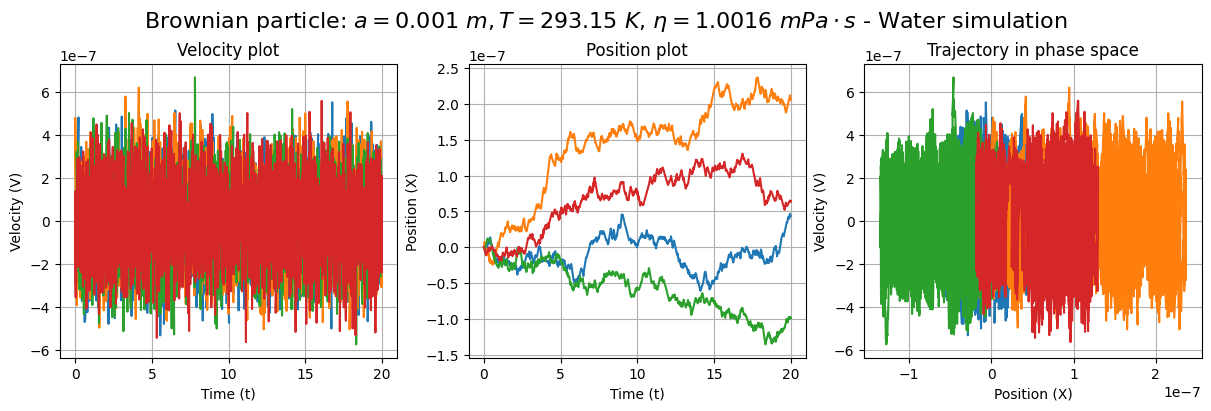

In [5]:
x0      = 0.;  v0     = 0.0                  # Initial position and velocity
tMax    = 20; tSteps = 100_000; dt = tMax/tSteps
TrajsX  = []; TrajsV = []
M       = 4                                  # Number of trajectories

# Physical parameters
eta     = 1.0016e-3                          # Viscosity of water
a       = 1e-3                               # Particle's radius
H2O_Rho = 997                                # Density of water (SI: Kg/m^3)
Mass    = (4/3)*np.pi*(a**3)*(5e-2*H2O_Rho)  # Particle is considered to be 0.05 times as dense as water!
Gamma   = 6*np.pi*eta*a/Mass                      # Damping coefficient
T       = 293.15                             # Room temperature: ~300K
kB      = 1.380649e-23                       # Boltzmann constant (SI units)
D       = kB*T*Gamma/Mass                    # Diffusion constant: From the Fluctuation-Dissipation theorem.

# Euler-Maruyama loop
for m in range(M):
    xVec   = [x0]
    vVec   = [v0]
    dW     = np.random.normal(0., np.sqrt(dt), size = tSteps) # Wiener process: Mean = 0; Std_Dev = Sqrt(Var) = Sqrt(dt).
    for i in range(tSteps):
        xVec.append(xVec[i] + vVec[i] * dt)
        vVec.append(vVec[i] - Gamma * vVec[i] * dt + np.sqrt(2*D) * dW[i])
    TrajsX.append(xVec)
    TrajsV.append(vVec)

# Plotting results
fig, axs = plt.subplots(1, 3, layout='constrained', figsize=(12, 4))
fig.suptitle(rf'Brownian particle: $a = {a}$ $m, T = {T}$ $K$, $\eta = {eta*1e3}$ $mPa \cdot s$ - Water simulation', fontsize = 16)
for i in range(M):
    axs[0].plot(np.linspace(0., tMax, tSteps + 1), TrajsV[i])
axs[0].set_xlabel("Time (t)")
axs[0].set_ylabel("Velocity (V)")
axs[0].set_title(r"Velocity plot")
axs[0].grid(True)

for i in range(M):
    axs[1].plot(np.linspace(0., tMax, tSteps + 1), TrajsX[i])
axs[1].set_xlabel("Time (t)")
axs[1].set_ylabel("Position (X)")
axs[1].set_title(r"Position plot")
axs[1].grid(True)

for i in range(M):
    axs[2].plot(TrajsX[i], TrajsV[i])
axs[2].set_xlabel("Position (X)")
axs[2].set_ylabel("Velocity (V)")
axs[2].set_title(r"Trajectory in phase space")
axs[2].grid(True)

In [6]:
# Diffusion constants
print(f'D = {D}.')
print(f'D_X = {D/(Gamma**2)}.')

# Reynolds number?
dv = np.array(vVec[:-1]) - np.array(vVec[1:])
Mass*dv/dt/(Gamma*Mass*dt*np.array(vVec))[1:]

D = 1.7525123060514646e-12.
D_X = 2.1437677943039207e-16.


array([-276502.04117856, -181540.55165764,  617957.64075253, ...,
        124628.11324789, 5762977.1479455 , -305203.04912407])

Conditions:
- Radius: $a = 1$ $\mu m$;
- Viscosity of water: $\eta = 1.0016  \times 10^{-3} Pa \cdot s$;
- Room temperature: $T =  293.15$ $K$.

Under these conditions, we can have displacements of the order of 10 $\mu m$! I also tried with $a = 1$ $nm$, which yielded displacements of the order of $cm$! To see this, just change the value of $a$. It probably isn't useful to go further than that, since we cannot really fabricate (meaningful) things much smaller than that.